<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/IntroTimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## An Introduction to Time Series Analysis Examples

Created: 03/18/2023

Updated: 04/04/2023



In [1]:
from pandas.core.algorithms import SelectNSeries
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
# Read the monthly means CO2 levels dataset from Mauna Loa Observatory
# URL= https://gml.noaa.gov/ccgg/trends/data.html 

co2data = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/MaunaLoaCO2/co2_mm_mlo.csv"

# The file has Metadata first 56 lines
# The column names are in line 57
df_dist = pd.read_csv(co2data, header=0 , skiprows=56)


# Print the dataframe head.
df_dist.head()


,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


In [ ]:
df_dist.tail()


,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
775,2022,10,2022.7917,415.78,419.13,30,0.27,0.10
776,2022,11,2022.8750,417.51,419.51,25,0.52,0.20
777,2022,12,2022.9583,418.95,419.64,24,0.50,0.20
778,2023,1,2023.0417,419.47,419.14,31,0.40,0.14
779,2023,2,2023.1250,420.41,419.49,25,0.64,0.25


In [ ]:
# Print dataframe general info
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            780 non-null    int64  
 1   month           780 non-null    int64  
 2   decimal date    780 non-null    float64
 3   average         780 non-null    float64
 4   deseasonalized  780 non-null    float64
 5   ndays           780 non-null    int64  
 6   sdev            780 non-null    float64
 7   unc             780 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 48.9 KB


In [ ]:
df_dist.describe()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,1990.166667,6.500000,1990.666037,357.901667,357.899833,18.948718,-2.136654,-0.103295
std,18.777405,3.454268,18.776733,30.733433,30.680013,12.061138,4.555639,0.514992
min,1958.000000,1.000000,1958.202700,312.430000,314.430000,-1.000000,-9.990000,-0.990000
25%,1974.000000,3.750000,1974.437475,329.892500,330.357500,1.250000,-9.990000,0.000000
50%,1990.000000,6.500000,1990.666650,354.185000,354.685000,25.000000,0.390000,0.150000
75%,2006.000000,9.250000,2006.895825,382.662500,382.705000,28.000000,0.560000,0.210000
max,2023.000000,12.000000,2023.125000,420.990000,419.640000,31.000000,1.310000,0.580000


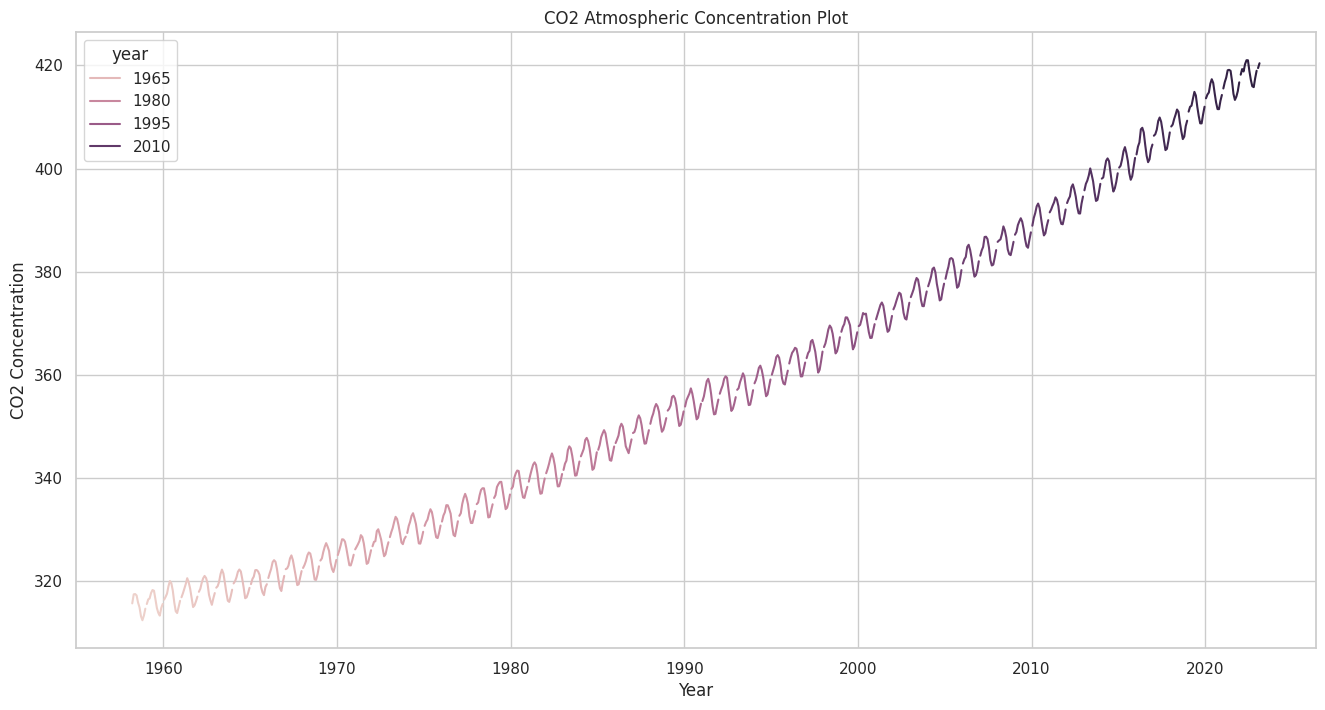

In [3]:
# Seaborn 
# Show Trend and seasonality of a time series

#define figure size and Seaborn style
sns.set(rc={"figure.figsize":(16, 8)}) #width=12, height=8
sns.set_style("whitegrid")

# Scatterplot
#sns.scatterplot(data=df_dist, x="decimal date", y="average", hue="year").set(
#    xlabel="Year", ylabel="CO2 Concentration", title="CO2 Atmospheric Concentration Plot");

# Lineplot
sns.lineplot(data=df_dist, x="decimal date", y="average", hue="year").set(
    xlabel="Year", ylabel="CO2 Concentration", title="CO2 Atmospheric Concentration Plot");
       

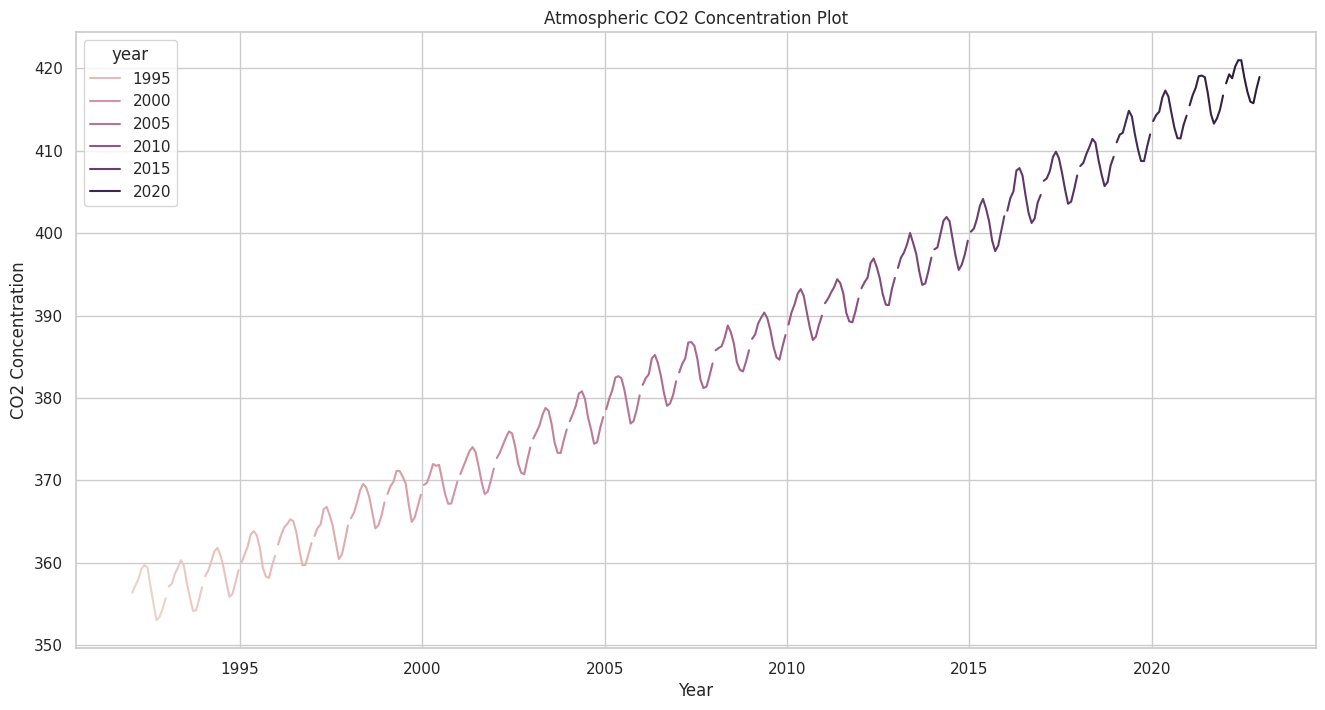

In [4]:
# Lineplot of a selected range of years: Last 30 years

df_range = df_dist[(df_dist["year"] >= 1992) & (df_dist["year"] <= 2022)]
sns.lineplot(data=df_range, x="decimal date", y="average", hue="year").set(
    xlabel="Year", ylabel="CO2 Concentration", title="Atmospheric CO2 Concentration Plot");


## Exponential Smoothing

Exponential smoothing is a widely used technique in time series forecasting that involves generating a smoothed series by giving more weight to recent observations and less weight to past observations. The basic idea behind exponential smoothing is to create a weighted average of the past observations, with the weights decreasing exponentially as the observations get older.

Holt-Winters method, is used when there is both a trend and seasonality in the data, and involves smoothing the time series using three smoothing parameters.

[Holt-Winters's seasonal method](https://otexts.com/fpp2/holt-winters.html) with additive trend, multiplicative seasonality and multiplicative error. 

Exponential smoothing is included in the [statsmodels library](https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html).

In [5]:
from seaborn.regression import statsmodels
# Import libraries
import statsmodels as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [6]:
# Create a simple time series
index = pd.date_range(start='1992-01', end='2022-12', freq='MS')
data = df_range['average'].values
df_co2 = pd.Series(data, index) 


In [7]:
# Show first 5 rows of the new monthly series
df_co2.head()


1992-01-01    356.34
1992-02-01    357.21
1992-03-01    357.97
1992-04-01    359.22
1992-05-01    359.71
Freq: MS, dtype: float64

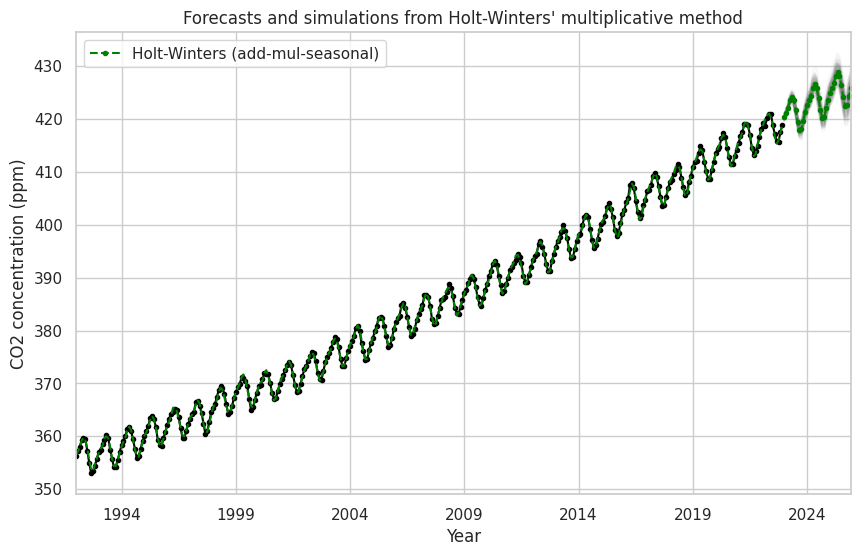

In [8]:
# Number of months for future forecast
num_mo = 36

fit = ExponentialSmoothing(
    df_co2,
    seasonal_periods=12, # we have monthly data, 12 per year.
    trend="add",
    seasonal="mul",
    initialization_method="estimated",
).fit()
simulations = fit.simulate(num_mo, repetitions=100, error="mul")

ax = df_co2.plot(
    figsize=(10, 6),
    marker=".",
    color="black",
    title="Forecasts and simulations from Holt-Winters' multiplicative method",
)
ax.set_ylabel("CO2 concentration (ppm)")
ax.set_xlabel("Year")
fit.fittedvalues.plot(ax=ax, style="--", color="green")
simulations.plot(ax=ax, style="-", alpha=0.05, color="grey", legend=False)
fit.forecast(num_mo).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker=".", color="green", legend=True
)
plt.show()


## Non-seasonal ARIMA models

If we combine differencing with [autoregression AR(p)](https://otexts.com/fpp2/AR.html) and a [moving average MA(q)](https://otexts.com/fpp2/MA.html) model, we obtain a [non-seasonal ARIMA model](https://otexts.com/fpp2/non-seasonal-arima.html). ARIMA is an acronym for _AutoRegressive Integrated Moving Average_ ARIMA(p,d,q), 

where

p = order of the autoregressive part;<br>
d = degree of first differencing involved;<br>
q = order of the moving average part.<br>

Will use the augmented [Dickey-Fuller test (ADF)](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test#:~:text=In%20statistics%2C%20an%20augmented%20Dickey,usually%20stationarity%20or%20trend%2Dstationarity). 

The augmented Dickey-Fuller (ADF) statistic, used in the test is a negative number. The more negative it ios, the stronger the rejection of the hypothesis of stationarity. 

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import acf, pacf

from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


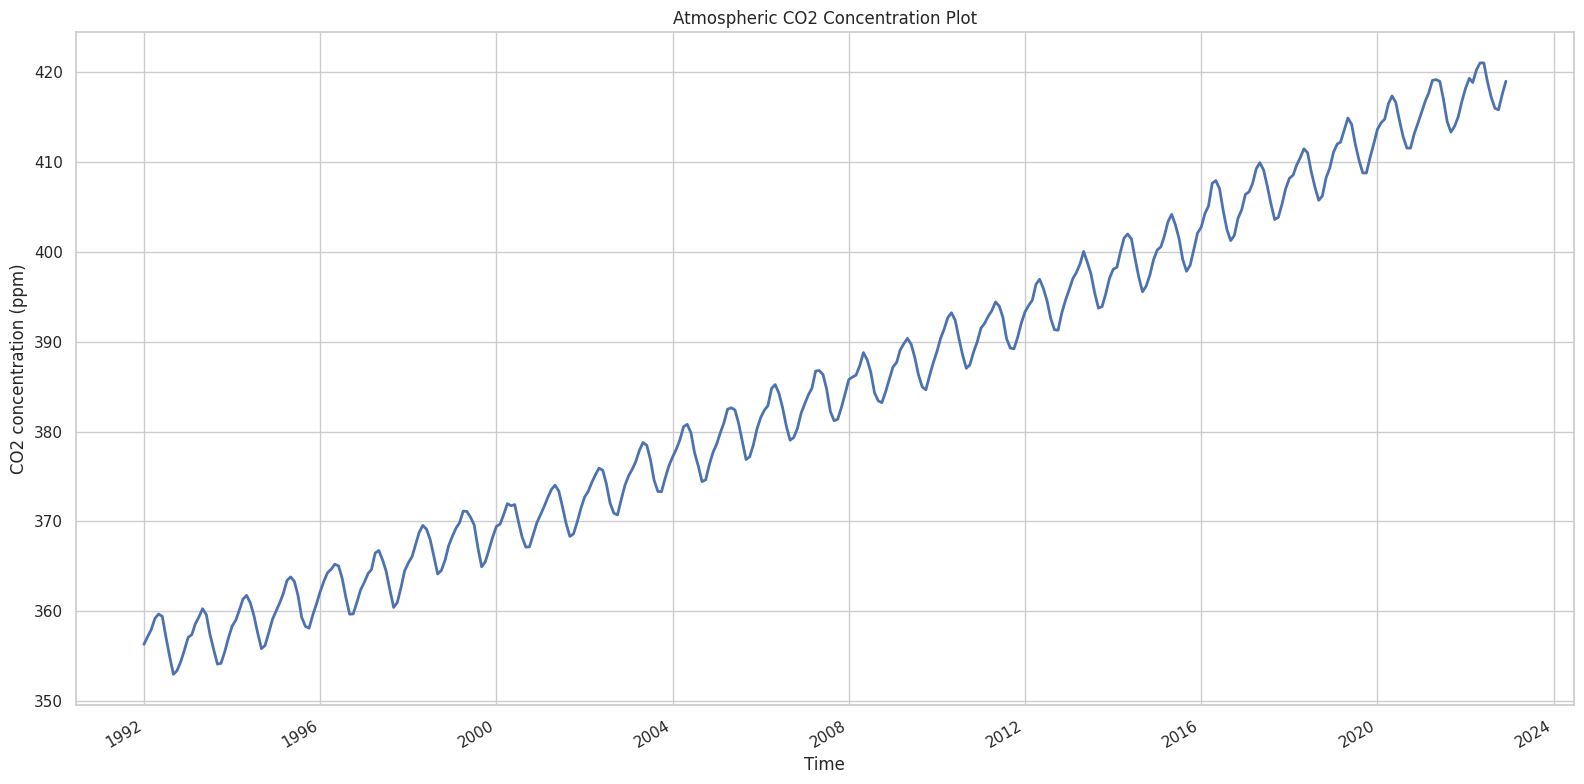

In [10]:
# Plot CO2 concentration evolution
fig, ax = plt.subplots()

ax.plot(df_co2, linewidth=2.0)
ax.set_xlabel('Time')
ax.set_ylabel('CO2 concentration (ppm)')
ax.set_title('Atmospheric CO2 Concentration Plot')

fig.autofmt_xdate()
plt.tight_layout()


In [11]:
# If series is stationary, will result p-value < 0.5, else we reject the hypothesis
ad_fuller_result = adfuller(df_co2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')


ADF Statistic: 1.6473848483305509
p-value: 0.9979929958729477


In [12]:
# Since the series is not stationary, we need to apply differencing and check the p-value

df_co2_diff = np.diff(df_co2, n=1)

ad_fuller_result = adfuller(df_co2_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')


ADF Statistic: -4.441772983456545
p-value: 0.00025018258993474314


The series is now stationary. We can therefore set _d=1_ (number of differentiations) 

In [13]:
# We split the data in test and train. We can take the las 3 years for testing (24 values).
n_mo = 36
train = df_co2[:-n_mo]
test = df_co2[-n_mo:]

print(len(train))
print(len(test))


336
36


In [14]:
df_co2.shape

(372,)

In [15]:
# Define an optimization algorithm that uses ARIMA to find the appropriate 
# parameter values p and q.

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df
    

In [16]:
# Parameter space
ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 1

order_list = list(product(ps, qs))


In [17]:
result_df = optimize_ARIMA(train, order_list, d)
result_df


  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)",AIC
0,"(2, 3)",659.129957
1,"(3, 3)",751.120607
2,"(2, 1)",751.281811
3,"(3, 1)",753.225997
4,"(2, 2)",753.229625
5,"(3, 2)",754.370722
6,"(3, 0)",778.821175
7,"(0, 3)",805.740385
8,"(1, 3)",806.186525
9,"(2, 0)",809.655087


We need to look at the set of parameters (p,q) with lowest AIC value. 
In this case it is (2,3). So, if we already have _d=1_, the best fit is ARIMA(p,d,q) = ARIMA(2,1,3) model.

In [18]:
model = SARIMAX(train, order=(2,1,3), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  336
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -323.565
Date:                Tue, 04 Apr 2023   AIC                            659.130
Time:                        21:37:50   BIC                            682.015
Sample:                    01-01-1992   HQIC                           668.253
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7208      0.007    238.416      0.000       1.707       1.735
ar.L2         -0.9883      0.007   -147.055      0.000      -1.001      -0.975
ma.L1         -1.3672      0.058    -23.389      0.0

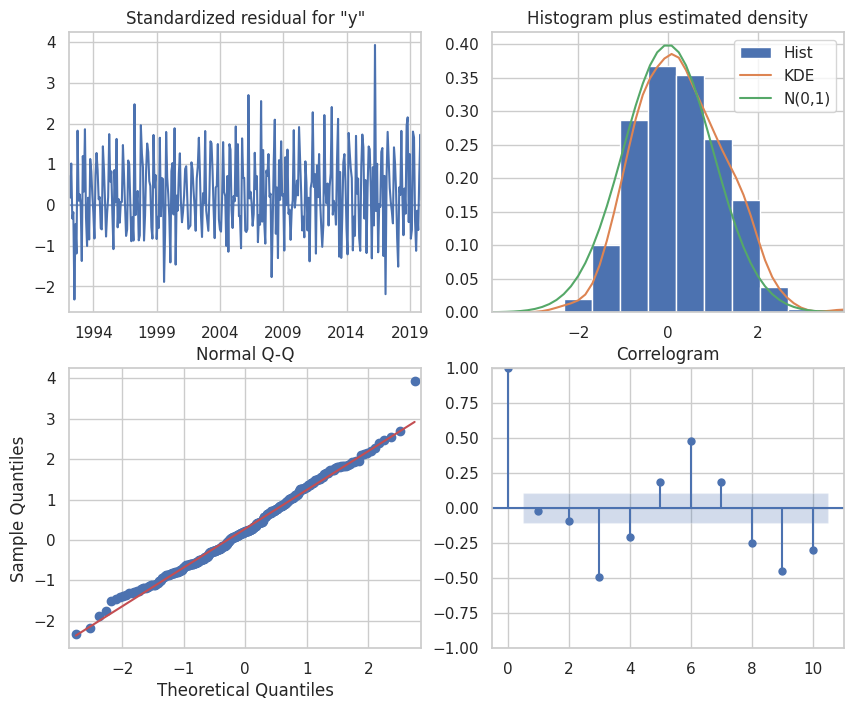

In [19]:
# Make a plot of the model fit

model_fit.plot_diagnostics(figsize=(10,8));


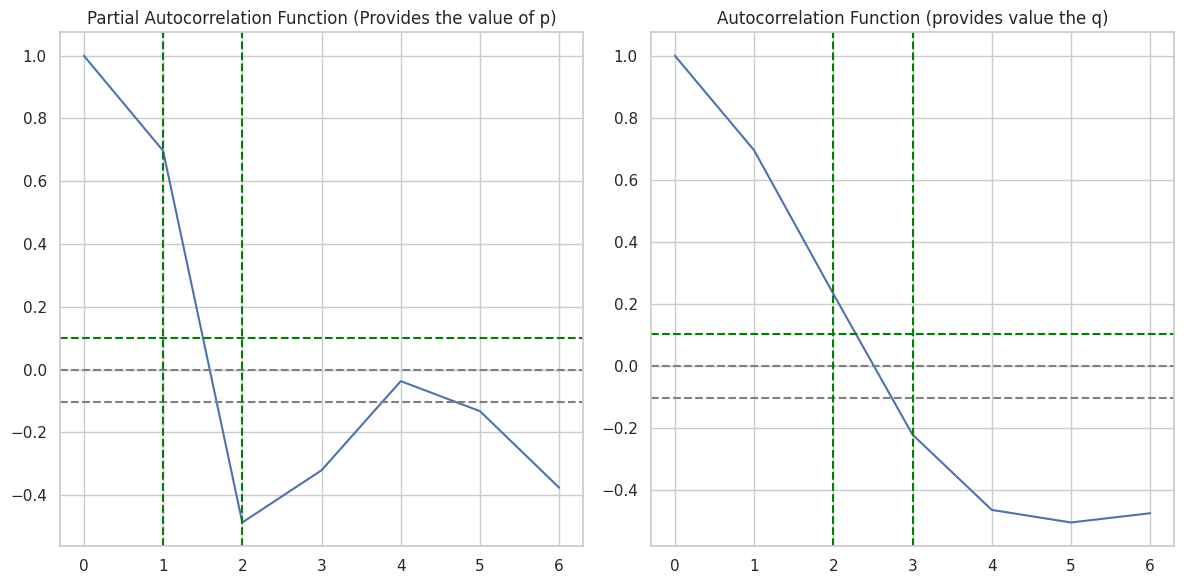

In [20]:
# Graphical method for determining the values of p and q of the ARIMA model
df_tmp = pd.DataFrame(df_co2_diff.T, columns=['CO2'])

lag_acf = acf(df_tmp, nlags=6)
lag_pacf = pacf(df_tmp, nlags=6, method = 'ols')

# Size of plots
plt.rcParams["figure.figsize"] = (12,6)
plt.grid()

# Plot of PACF (Partial Autocorrelation Function)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_tmp)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_tmp)), linestyle='--', color='green')
# Plot vertical lines for reference close to intersection of graphs 
plt.axvline(x=1, linestyle='--', color='green')
plt.axvline(x=2, linestyle='--', color='green')

plt.title('Partial Autocorrelation Function (Provides the value of p)')

# Plot of ACF (Autocorrelation Function)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_tmp)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_tmp)), linestyle='--', color='green')
# Plot reference vertical lines close to interesection of graphs
plt.axvline(x=2, linestyle='--', color='green')
plt.axvline(x=3, linestyle='--', color='green')

plt.title('Autocorrelation Function (provides value the q)')

plt.tight_layout()


From the above plots, the _p_ coefficient is the next integer to the right where the PACF function crosses the upper confidence line. Similarly, the value of _q_ is the next integer to the right where the ACF crosses the upper confidence level.

In [21]:
def test_stationarity(df_ts): 

  # Determine the satistics of moving averages
  rolmean = df_ts.rolling(window=12, center=True).mean()
  rolstd = df_ts.rolling(window=12, center=True).std()

  # Set the size of the plot
  plt.rcParams["figure.figsize"] = (12,6)
  sns.set_style("whitegrid")

  # Plot moving averages
  plt.plot(df_ts, color='blue',label='Original')
  plt.plot(rolmean, color='red', label='Rolling Mean')
  plt.plot(rolstd, color='black', label = 'Rolling Std Deviation')
  plt.legend(loc='best')
  plt.title('Moving Average and Standard Deviation')
  plt.grid()
  plt.show()
  # Test the Augmented Dickey-Fuller:
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(df_ts, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],
    index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)


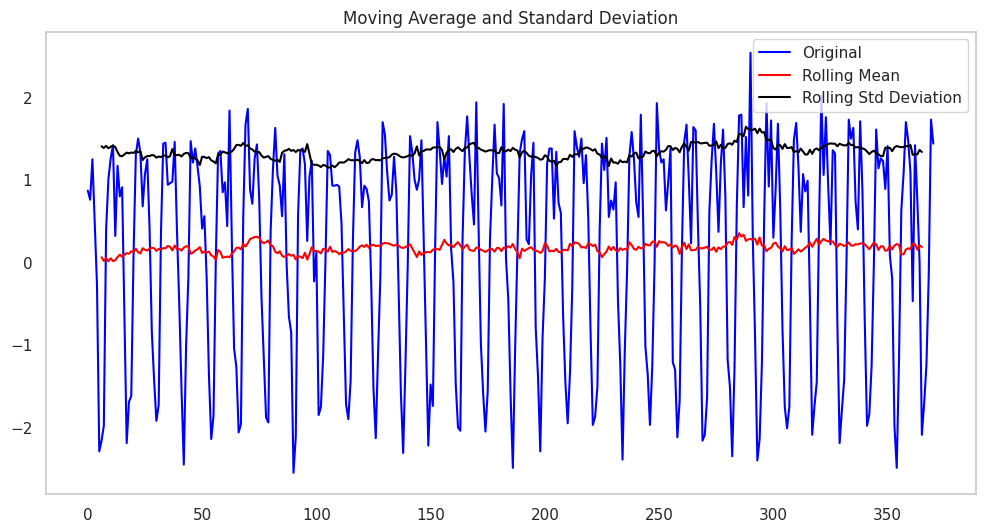

Results of Dickey-Fuller Test:
Test Statistic                  -4.441773
p-value                          0.000250
# Lags Used                     13.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64


In [22]:
# Test the stationarity of df_co2 with d=1
df_tmp = pd.DataFrame(df_co2_diff.T, columns=['CO2'])

test_stationarity(df_tmp)


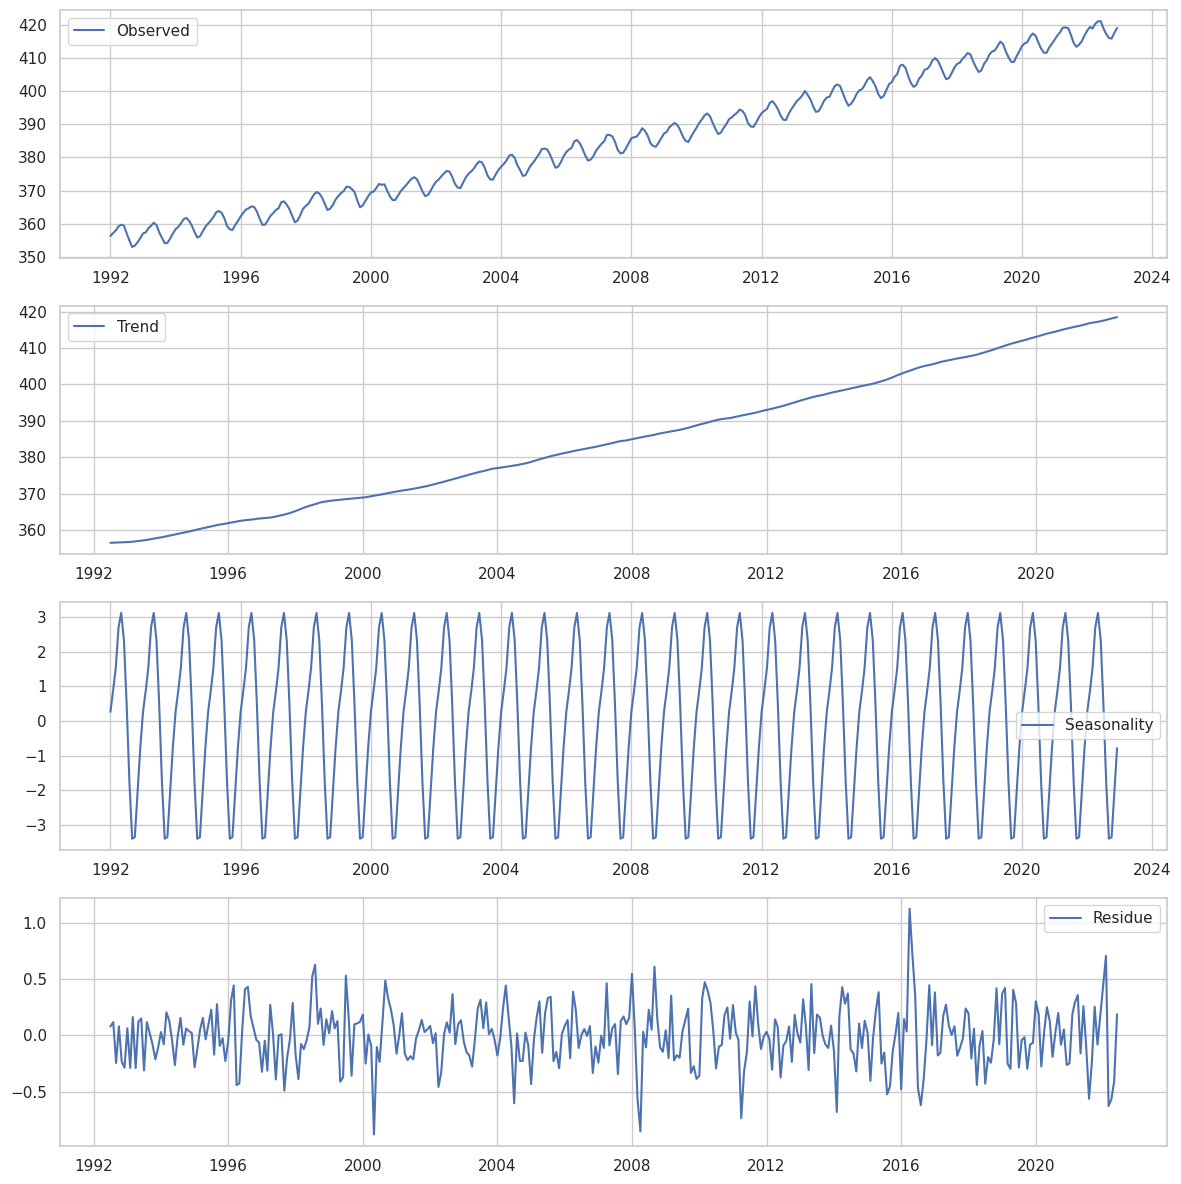

In [23]:
# Decomposition method using statsmodels.tsa library

cycle = 12 # Monthly data for a cycle
df_tmp = pd.DataFrame(df_co2.T, columns=['CO2'])


decomposition = sm.tsa.seasonal_decompose(df_tmp.interpolate(), model='additive', period=12)

# This function returns 3 components: Trend, seasonality and a residue 
trend = decomposition.trend
seasonal = decomposition.seasonal
residue = decomposition.resid

# Plotting the components
plt.rcParams["figure.figsize"] = (12,12)
plt.subplot(411)
plt.plot(df_co2, label='Observed')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residue, label='Residue')
plt.legend(loc='best')

# Tight layout
plt.tight_layout();


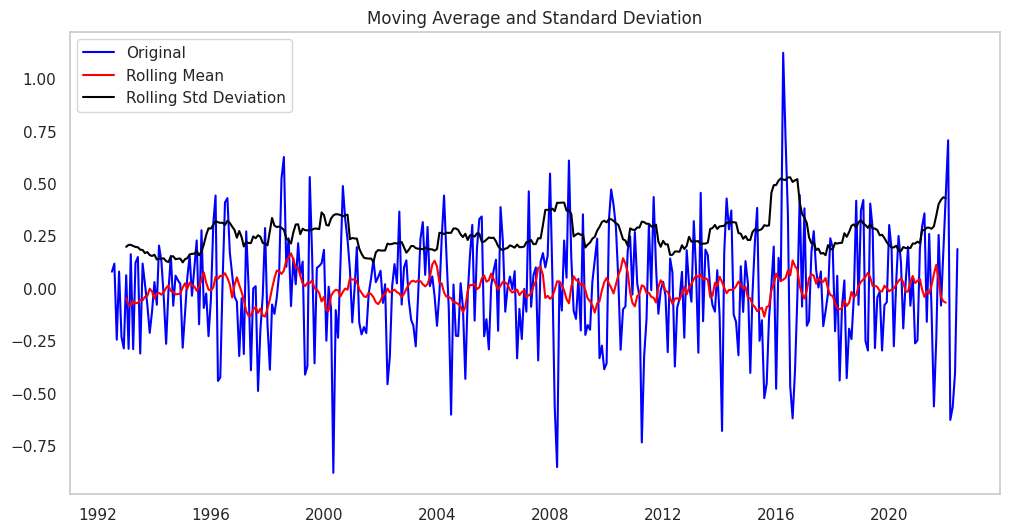

Results of Dickey-Fuller Test:
Test Statistic                -8.699700e+00
p-value                        3.838906e-14
# Lags Used                    9.000000e+00
Number of Observations Used    3.500000e+02
Critical Value (1%)           -3.449173e+00
Critical Value (5%)           -2.869833e+00
Critical Value (10%)          -2.571188e+00
dtype: float64


In [24]:
# Eliminating the Trend and Seasonality, we test if the Residue is a stationary time series

df_tmp_decompose = residue 
df_tmp_decompose.dropna(inplace=True)
test_stationarity(df_tmp_decompose)


## In progress. To be continued...